# Lending Club Case Study

**Problem Statement**

The Loan data set, contains information about past loan applicants and whether they ‘defaulted’ or not. The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending to risky applicants. 
In this case study also need to analysis consumer attributes and loan attributes influence the tendency of default




### Data Visualisation

In [5]:
#import the libraries
import pandas as pd
import numpy as np

In [7]:
#read the dataset and check the first five rows
df = pd.read_csv("loan.csv", low_memory=False)
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [8]:
#Check the shape of the dataframe total row and column 
df.shape

(39717, 111)

## Data Handling and Cleaning

Clean data set by making sure that there are no __missing values__ or __incorrect data types__ .

 - For Missing Values: 
    - Dropping the column containig too much missing values 
    - Dropping the rows containing the missing values
    - Imputing the missing values
    - Keep the missing values if they don't affect the analysis
    
 - Incorrect Data Types:
    - Clean certain values 
    - Clean and convert an entire column
 

In [13]:
#Check the datatypes of all the columns of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


#### Missing Value Treatment

In [16]:
#Check the number of null values in the columns
df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

Handling missing values for column tot_hi_cred_lim, total_bal_ex_mort, total_bc_limit, total_il_high_credit_limit 
 - As for these columns all rows are emplty i.e. 39717 
 - drop the columns

In [19]:
# drop column having 100% missing value
df = df.dropna(axis=1, how='all')
df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12942
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [21]:
## drop column which has > 25 % missing values
df = df.drop(columns=['mths_since_last_delinq','mths_since_last_record','next_pymnt_d','desc'])
df.isnull().sum()

id                               0
member_id                        0
loan_amnt                        0
funded_amnt                      0
funded_amnt_inv                  0
term                             0
int_rate                         0
installment                      0
grade                            0
sub_grade                        0
emp_title                     2459
emp_length                    1075
home_ownership                   0
annual_inc                       0
verification_status              0
issue_d                          0
loan_status                      0
pymnt_plan                       0
url                              0
purpose                          0
title                           11
zip_code                         0
addr_state                       0
dti                              0
delinq_2yrs                      0
earliest_cr_line                 0
inq_last_6mths                   0
open_acc                         0
pub_rec             

In [23]:
#Drop the rows having null values in the 'emp_title' field
df = df[~df['emp_title'].isnull()]
df.isnull().sum()

id                              0
member_id                       0
loan_amnt                       0
funded_amnt                     0
funded_amnt_inv                 0
term                            0
int_rate                        0
installment                     0
grade                           0
sub_grade                       0
emp_title                       0
emp_length                     56
home_ownership                  0
annual_inc                      0
verification_status             0
issue_d                         0
loan_status                     0
pymnt_plan                      0
url                             0
purpose                         0
title                           9
zip_code                        0
addr_state                      0
dti                             0
delinq_2yrs                     0
earliest_cr_line                0
inq_last_6mths                  0
open_acc                        0
pub_rec                         0
revol_bal     

In [25]:
#Drop the rows having null values in the 'emp_length' field
df = df[~df.emp_length.isnull()]
df.isnull().sum()

id                              0
member_id                       0
loan_amnt                       0
funded_amnt                     0
funded_amnt_inv                 0
term                            0
int_rate                        0
installment                     0
grade                           0
sub_grade                       0
emp_title                       0
emp_length                      0
home_ownership                  0
annual_inc                      0
verification_status             0
issue_d                         0
loan_status                     0
pymnt_plan                      0
url                             0
purpose                         0
title                           9
zip_code                        0
addr_state                      0
dti                             0
delinq_2yrs                     0
earliest_cr_line                0
inq_last_6mths                  0
open_acc                        0
pub_rec                         0
revol_bal     

In [27]:
#Drop the rows having null values in the 'title' field
df = df[~df.title.isnull()]
df.isnull().sum()

id                              0
member_id                       0
loan_amnt                       0
funded_amnt                     0
funded_amnt_inv                 0
term                            0
int_rate                        0
installment                     0
grade                           0
sub_grade                       0
emp_title                       0
emp_length                      0
home_ownership                  0
annual_inc                      0
verification_status             0
issue_d                         0
loan_status                     0
pymnt_plan                      0
url                             0
purpose                         0
title                           0
zip_code                        0
addr_state                      0
dti                             0
delinq_2yrs                     0
earliest_cr_line                0
inq_last_6mths                  0
open_acc                        0
pub_rec                         0
revol_bal     

In [29]:
#Drop the rows having null values in the 'revol_util' field 
df = df[~df.revol_util.isnull()]
df.isnull().sum()

id                              0
member_id                       0
loan_amnt                       0
funded_amnt                     0
funded_amnt_inv                 0
term                            0
int_rate                        0
installment                     0
grade                           0
sub_grade                       0
emp_title                       0
emp_length                      0
home_ownership                  0
annual_inc                      0
verification_status             0
issue_d                         0
loan_status                     0
pymnt_plan                      0
url                             0
purpose                         0
title                           0
zip_code                        0
addr_state                      0
dti                             0
delinq_2yrs                     0
earliest_cr_line                0
inq_last_6mths                  0
open_acc                        0
pub_rec                         0
revol_bal     

In [31]:
#Drop the rows having null values in the 'last_pymnt_d' field 
df = df[~df.last_pymnt_d.isnull()]
df.isnull().sum()

id                              0
member_id                       0
loan_amnt                       0
funded_amnt                     0
funded_amnt_inv                 0
term                            0
int_rate                        0
installment                     0
grade                           0
sub_grade                       0
emp_title                       0
emp_length                      0
home_ownership                  0
annual_inc                      0
verification_status             0
issue_d                         0
loan_status                     0
pymnt_plan                      0
url                             0
purpose                         0
title                           0
zip_code                        0
addr_state                      0
dti                             0
delinq_2yrs                     0
earliest_cr_line                0
inq_last_6mths                  0
open_acc                        0
pub_rec                         0
revol_bal     

In [33]:
#Drop the rows having null values in the 'collections_12_mths_ex_med' field 
df = df[~df.collections_12_mths_ex_med.isnull()]
df.isnull().sum()

id                              0
member_id                       0
loan_amnt                       0
funded_amnt                     0
funded_amnt_inv                 0
term                            0
int_rate                        0
installment                     0
grade                           0
sub_grade                       0
emp_title                       0
emp_length                      0
home_ownership                  0
annual_inc                      0
verification_status             0
issue_d                         0
loan_status                     0
pymnt_plan                      0
url                             0
purpose                         0
title                           0
zip_code                        0
addr_state                      0
dti                             0
delinq_2yrs                     0
earliest_cr_line                0
inq_last_6mths                  0
open_acc                        0
pub_rec                         0
revol_bal     

In [35]:
#Drop the rows having null values in the 'pub_rec_bankruptcies' field 
df = df[~df.pub_rec_bankruptcies.isnull()]
df.isnull().sum()

id                            0
member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_title                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
pymnt_plan                    0
url                           0
purpose                       0
title                         0
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_ac

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36431 entries, 1 to 39623
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          36431 non-null  int64  
 1   member_id                   36431 non-null  int64  
 2   loan_amnt                   36431 non-null  int64  
 3   funded_amnt                 36431 non-null  int64  
 4   funded_amnt_inv             36431 non-null  float64
 5   term                        36431 non-null  object 
 6   int_rate                    36431 non-null  object 
 7   installment                 36431 non-null  float64
 8   grade                       36431 non-null  object 
 9   sub_grade                   36431 non-null  object 
 10  emp_title                   36431 non-null  object 
 11  emp_length                  36431 non-null  object 
 12  home_ownership              36431 non-null  object 
 13  annual_inc                  36431 no

In [39]:
#reset index 
df = df.reset_index(drop=True)

In [41]:
#Check the shape of the dataframe
df.shape

(36431, 53)

In [43]:
#Check the datatypes of all the columns 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36431 entries, 0 to 36430
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          36431 non-null  int64  
 1   member_id                   36431 non-null  int64  
 2   loan_amnt                   36431 non-null  int64  
 3   funded_amnt                 36431 non-null  int64  
 4   funded_amnt_inv             36431 non-null  float64
 5   term                        36431 non-null  object 
 6   int_rate                    36431 non-null  object 
 7   installment                 36431 non-null  float64
 8   grade                       36431 non-null  object 
 9   sub_grade                   36431 non-null  object 
 10  emp_title                   36431 non-null  object 
 11  emp_length                  36431 non-null  object 
 12  home_ownership              36431 non-null  object 
 13  annual_inc                  364

In [45]:
# drop duplicate entries
df =df.drop_duplicates()
df.shape

(36431, 53)

In [47]:
#Check the most common value in the term column
df.term.value_counts()

term
36 months    26375
60 months    10056
Name: count, dtype: int64

In [49]:
#Check the most common value in the grade column
df.grade.value_counts()

grade
B    11035
A     9175
C     7430
D     4874
E     2650
F      969
G      298
Name: count, dtype: int64

In [51]:
#Check the most common value in the sub_grade column
df.sub_grade.value_counts()

sub_grade
B3    2674
A4    2673
B5    2529
A5    2511
B4    2319
C1    1949
C2    1870
B2    1870
B1    1643
A3    1630
C3    1406
A2    1356
D2    1245
C4    1123
C5    1082
D3    1078
A1    1005
D4     905
D1     845
D5     801
E1     729
E2     606
E3     516
E4     423
E5     376
F1     315
F2     230
F3     170
F4     151
F5     103
G1      98
G2      75
G4      56
G3      44
G5      25
Name: count, dtype: int64

In [53]:
#Check the most common value in the emp_title column
df.emp_title.value_counts()

emp_title
US Army                             131
Bank of America                     108
IBM                                  66
AT&T                                 59
Kaiser Permanente                    55
                                   ... 
KBI Sonic                             1
MGA Healthcare                        1
Complete Home Health                  1
Nassau University Medical Center      1
E.E. Wine Inc                         1
Name: count, Length: 28205, dtype: int64

In [55]:
#Check the most common value in the emp_length column
df.emp_length.value_counts()

emp_length
10+ years    8407
2 years      4176
< 1 year     4052
3 years      3914
4 years      3297
5 years      3129
1 year       3026
6 years      2121
7 years      1697
8 years      1405
9 years      1207
Name: count, dtype: int64

In [57]:
#Check the most common value in the verificaton status column
df.verification_status.value_counts()

verification_status
Not Verified       15054
Verified           11926
Source Verified     9451
Name: count, dtype: int64

In [59]:
#Check the most common value in the acc_now_delinq column
df.acc_now_delinq.value_counts()

acc_now_delinq
0    36431
Name: count, dtype: int64

### Observation - The acc_now_delinq values are all 0, indicating there are no delinquencies for any users.

In [62]:
#Check the most common value in the delinq_amount column
df.delinq_amnt.value_counts()

delinq_amnt
0    36431
Name: count, dtype: int64

### Observation - The delinq_amnt values are all 0, indicating there is no delinquent amount for any users

In [65]:
#Check the most common value in the addr_state column
df.addr_state.value_counts()

addr_state
CA    6536
NY    3494
FL    2616
TX    2516
NJ    1723
IL    1426
PA    1417
VA    1296
GA    1291
MA    1222
OH    1138
MD     974
AZ     783
WA     741
CO     707
NC     704
CT     678
MI     656
MO     624
MN     563
NV     460
SC     435
AL     413
OR     412
WI     406
LA     398
KY     306
OK     283
KS     249
UT     234
AR     225
DC     206
RI     189
NM     167
HI     161
WV     161
NH     151
DE     106
WY      78
AK      75
MT      73
SD      57
VT      48
MS      18
TN      10
ID       3
IA       1
NE       1
Name: count, dtype: int64

In [67]:
#Check the common value in the applicaton_type column
df.application_type.value_counts()

application_type
INDIVIDUAL    36431
Name: count, dtype: int64

### Observation - All application type are individual application no joint application with two co-borrowers

In [70]:
#Check the common value in the home_ownership column
df.home_ownership.value_counts()

home_ownership
RENT        17464
MORTGAGE    16298
OWN          2575
OTHER          94
Name: count, dtype: int64

In [72]:
#Check the common value in the pymnt_plan column
df.pymnt_plan.value_counts()

pymnt_plan
n    36431
Name: count, dtype: int64

### Observation - Payment plan put in place is 'n' for all application 

In [75]:
#Check the common value in the title column
df.title.value_counts()

title
Debt Consolidation                      2064
Debt Consolidation Loan                 1644
Personal Loan                            607
Consolidation                            488
debt consolidation                       467
                                        ... 
cashflow                                   1
new                                        1
DEBT CONSOLIDATION  STRONG BORROWER       1
HealBySteel                                1
Want to pay off high intrest cards         1
Name: count, Length: 17952, dtype: int64

In [77]:
#Check the common value in the delinq_2yrs column
df.delinq_2yrs.value_counts()

delinq_2yrs
0     32484
1      3028
2       628
3       197
4        55
5        21
6        10
7         4
8         2
9         1
11        1
Name: count, dtype: int64

### Observation - Total number of times the borrower has had any payment overdue by 30 days or more in the last two years.

In [82]:
#Check the common value in the open_acc column
df.open_acc.value_counts()

open_acc
7     3681
8     3619
6     3614
9     3444
10    2983
5     2881
11    2563
12    2124
4     2079
13    1763
14    1384
3     1313
15    1100
16     877
17     683
18     505
2      485
19     372
20     270
21     231
22     134
23      87
24      69
25      51
26      29
28      23
27      20
30      13
29      12
34       5
31       5
32       3
33       3
36       2
39       1
38       1
44       1
35       1
Name: count, dtype: int64

### observation Number of open account 

In [86]:
df.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                           object
int_rate                       object
installment                   float64
grade                          object
sub_grade                      object
emp_title                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                    object
pymnt_plan                     object
url                            object
purpose                        object
title                          object
zip_code                       object
addr_state                     object
dti                           float64
delinq_2yrs                     int64
earliest_cr_line               object
inq_last_6mt

In [88]:
#Check the common value in the rate column
df.int_rate.value_counts()

int_rate
10.99%    901
13.49%    785
11.49%    768
7.51%     731
7.88%     674
         ... 
18.72%      1
16.20%      1
17.46%      1
17.54%      1
12.49%      1
Name: count, Length: 333, dtype: int64

In [90]:
# remove % and make data as numaric value
df.int_rate = df.int_rate.apply(lambda x : 0 if x==0 else float(x[:-1]))

In [92]:
df.int_rate.value_counts()

int_rate
10.99    901
13.49    785
11.49    768
7.51     731
7.88     674
        ... 
18.72      1
16.20      1
17.46      1
17.54      1
12.49      1
Name: count, Length: 333, dtype: int64

In [94]:
#Check the common value in the Loan Status column
df.loan_status.value_counts()

loan_status
Fully Paid     30423
Charged Off     4942
Current         1066
Name: count, dtype: int64

## Observation : Customer Labled as Charged off are Defaulter 

In [98]:
#Check the common value in the revol_util column
df.revol_util.value_counts()

revol_util
0%        852
0.20%      58
66.60%     55
64.80%     55
61%        55
         ... 
25.74%      1
0.83%       1
47.36%      1
24.65%      1
7.28%       1
Name: count, Length: 1082, dtype: int64

In [100]:
# remove % and make data as numaric value
df.revol_util = df.revol_util.apply(lambda x : 0 if x==0 else float(x[:-1]))

In [102]:
df.revol_util.value_counts()

revol_util
0.00     852
0.20      58
66.60     55
64.80     55
61.00     55
        ... 
25.74      1
0.83       1
47.36      1
24.65      1
7.28       1
Name: count, Length: 1082, dtype: int64

In [104]:
#Check the common value in the purpose column
df.purpose.value_counts()

purpose
debt_consolidation    17468
credit_card            4726
other                  3575
home_improvement       2705
major_purchase         2008
car                    1443
small_business         1414
wedding                 886
medical                 634
moving                  529
house                   343
vacation                336
educational             276
renewable_energy         88
Name: count, dtype: int64

## Need to address duplicates or inconsitency in columns title and emp_title --- To be checked ?? 

In [108]:
df.title.unique()

array(['bike', 'personel', 'Personal', ...,
       'Better habits and New Start for 2008', 'no credit cards for me',
       'Want to pay off high intrest cards'], dtype=object)

In [110]:
df.emp_title.unique()

array(['Ryder', 'AIR RESOURCES BOARD', 'University Medical Group', ...,
       'Modern Woodmen of America', 'Fullmoon Software', 'E.E. Wine Inc'],
      dtype=object)

In [113]:
# zip code value counts
df.zip_code.value_counts()

zip_code
100xx    540
945xx    508
112xx    480
606xx    477
070xx    440
        ... 
090xx      1
831xx      1
736xx      1
007xx      1
753xx      1
Name: count, Length: 805, dtype: int64

In [116]:
df.describe(include='all')

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,3.643100e+04,3.643100e+04,36431.000000,36431.000000,36431.000000,36431,36431.000000,36431.000000,36431,36431,...,36431.000000,36431,36431.0,36431.0,36431,36431.0,36431.0,36431.0,36431.000000,36431.0
unique,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,7,35,...,NaN,96,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,36 months,NaN,NaN,B,B3,...,NaN,May-16,NaN,NaN,INDIVIDUAL,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,26375,NaN,NaN,11035,2674,...,NaN,9626,NaN,NaN,36431,NaN,NaN,NaN,NaN,NaN
mean,6.910141e+05,8.611116e+05,11307.794186,11032.933491,10601.876895,NaN,12.073891,326.187642,NaN,NaN,...,2743.075381,NaN,0.0,1.0,NaN,0.0,0.0,0.0,0.041366,0.0
std,2.026042e+05,2.538291e+05,7433.904309,7166.520054,7072.645601,NaN,3.734857,207.390058,NaN,NaN,...,4473.621163,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.200100,0.0
min,5.574200e+04,1.144260e+05,500.000000,500.000000,0.000000,NaN,5.420000,16.080000,NaN,NaN,...,0.010000,NaN,0.0,1.0,NaN,0.0,0.0,0.0,0.000000,0.0
25%,5.226890e+05,6.755430e+05,5600.000000,5500.000000,5000.000000,NaN,9.320000,168.900000,NaN,NaN,...,226.310000,NaN,0.0,1.0,NaN,0.0,0.0,0.0,0.000000,0.0
50%,6.705750e+05,8.569760e+05,10000.000000,10000.000000,9203.371902,NaN,11.860000,283.280000,NaN,NaN,...,571.700000,NaN,0.0,1.0,NaN,0.0,0.0,0.0,0.000000,0.0
75%,8.399035e+05,1.049794e+06,15000.000000,15000.000000,14508.774540,NaN,14.650000,432.220000,NaN,NaN,...,3457.620000,NaN,0.0,1.0,NaN,0.0,0.0,0.0,0.000000,0.0


## EDA Univariate and bivariate Analysis

### understanding loan deafult status

In [120]:
import matplotlib.pyplot as plt
%matplotlib inline

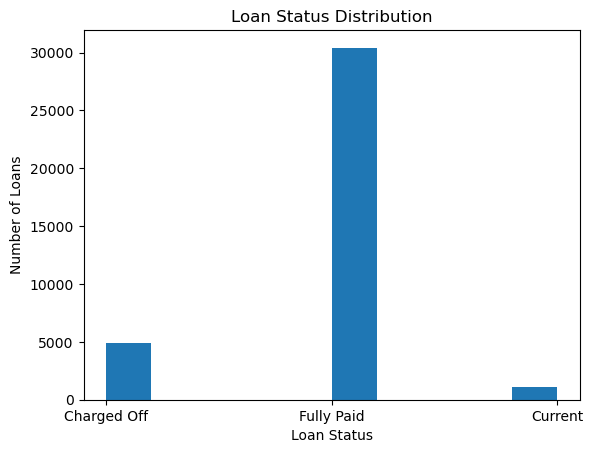

In [121]:
#Plot histogram of loan status
plt.hist(df.loan_status)
plt.title("Loan Status Distribution")
plt.xlabel("Loan Status")
plt.ylabel("Number of Loans")
plt.show()

In [123]:
# Calculate the Loan status percentage
loan_staus_count = df.loan_status.value_counts()
loan_staus_percentage = (loan_staus_count / loan_staus_count.sum()) * 100
loan_staus_percentage

loan_status
Fully Paid     83.508550
Charged Off    13.565370
Current         2.926079
Name: count, dtype: float64

### Loan status percentage Fully Paid 83.5 % Charged off 13.5% and current 3 % 

In [128]:
import warnings
warnings.filterwarnings("ignore")

In [130]:
import seaborn as sns

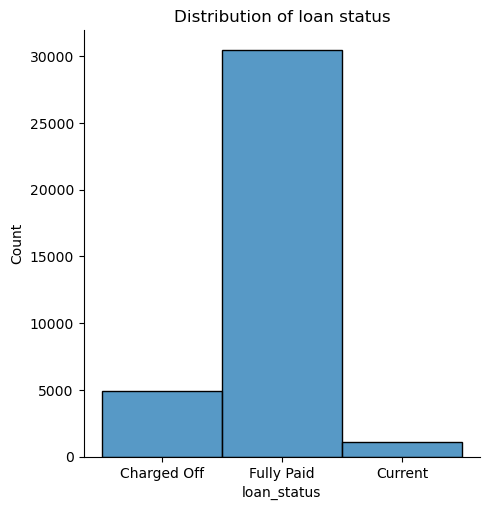

In [131]:
#Plot histogram of loan status
sns.displot(df.loan_status)
plt.title("Distribution of loan status")
plt.show()

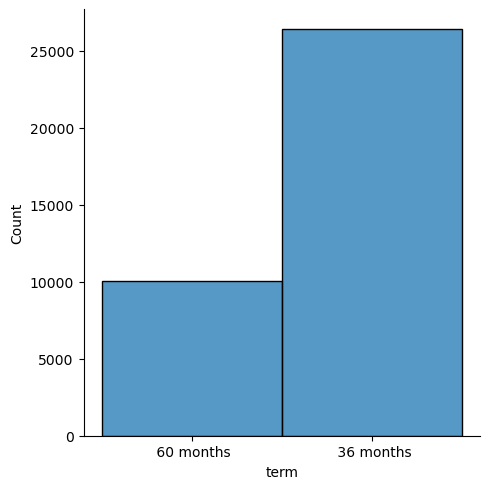

In [132]:
# plot term
sns.displot(df.term)
plt.show()

### Observation : more number of loan given to the 36 months terms 

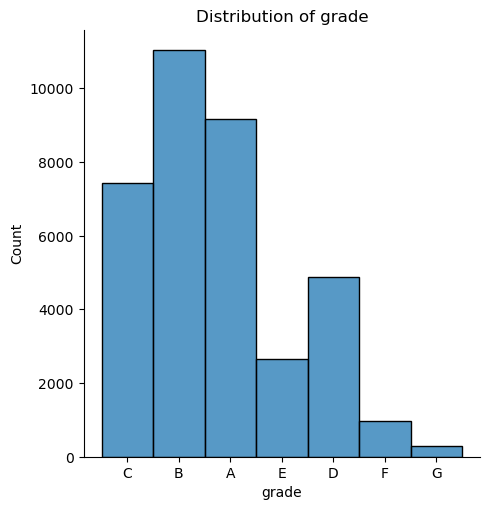

In [138]:
# ploat Grade distribution 
sns.displot(df.grade)
plt.title("Distribution of grade")
plt.show()

### Grade B, A and C having more in numbers compare to E,D,F,G

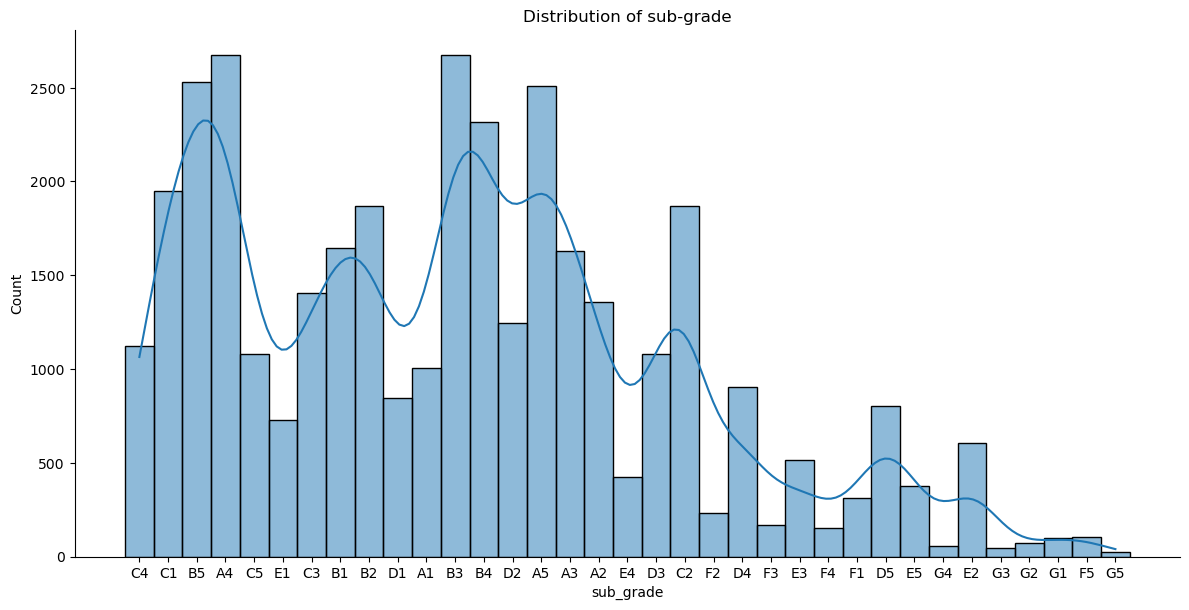

In [142]:
# Distribution of sub_grade
sns.displot(df.sub_grade,kde=True, height=6, aspect=2)
plt.title("Distribution of sub-grade")
plt.show()

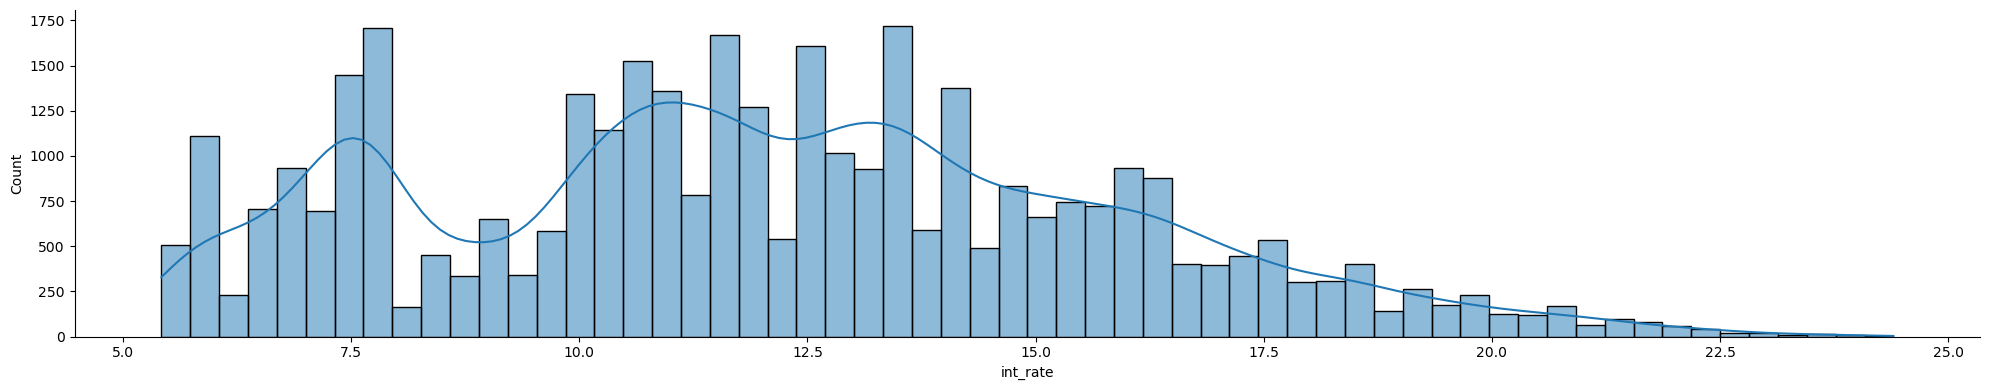

In [143]:
sns.displot(df.int_rate,kde=True, height=4, aspect=5)
plt.show()

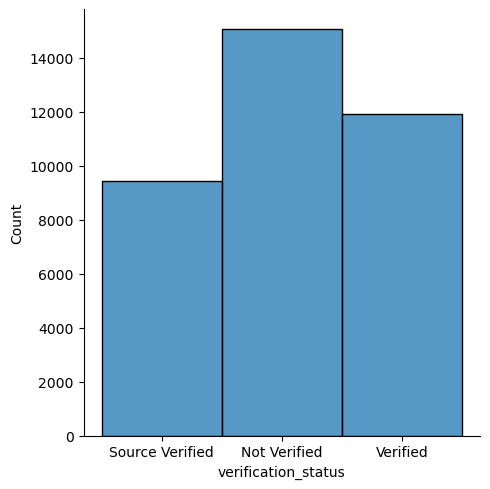

In [145]:
# distributation of verification status 
sns.displot(df.verification_status)
plt.show()

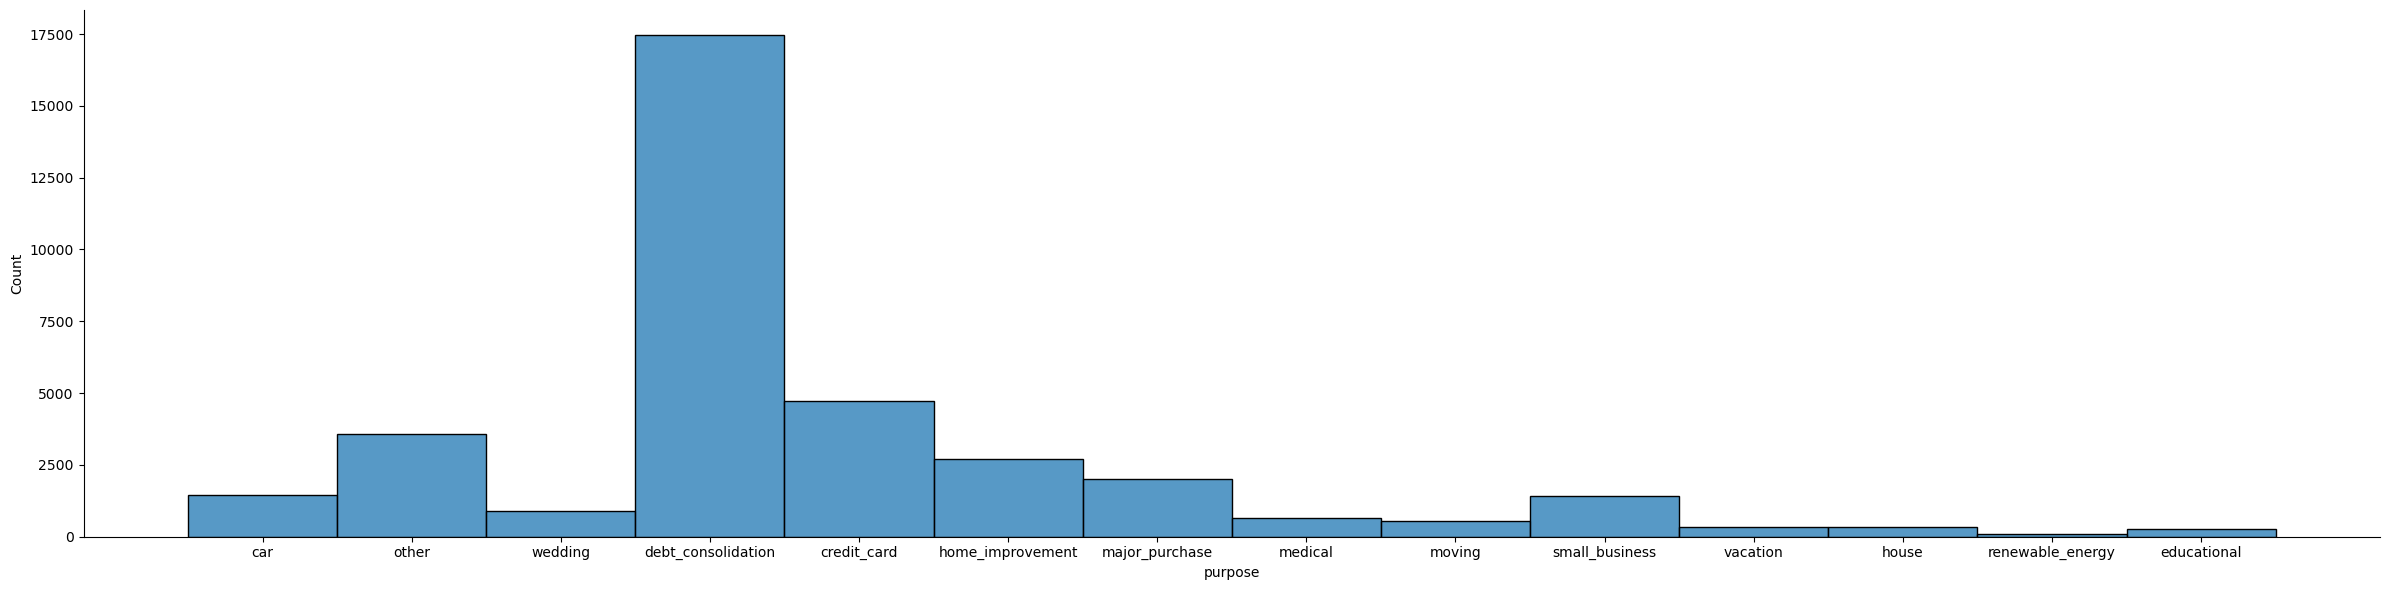

In [149]:
# distributation of category provided by borrower status
sns.displot(df.purpose, height=6, aspect=4)
plt.show()

### Bivariate analysis between verificatin_status and loan_status

In [153]:
# created Pivot table verification_Status and loan_status
loan_verification_status = df.pivot_table(index='loan_status', columns='verification_status', aggfunc='size', fill_value=0)
loan_verification_status

verification_status,Not Verified,Source Verified,Verified
loan_status,,,
Charged Off,1769,1322,1851
Current,216,287,563
Fully Paid,13069,7842,9512


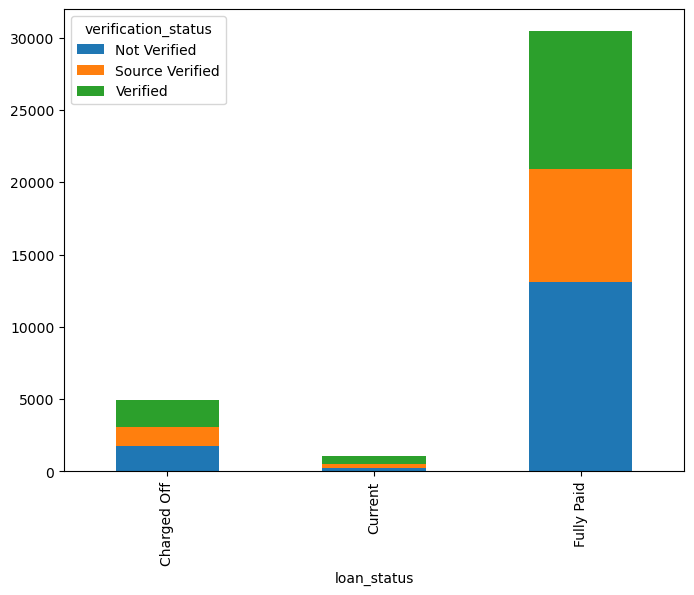

In [155]:
#Plot the stacked bar chart 
loan_verification_status.plot(kind='bar', stacked = 'True', figsize=[8,6])
plt.show()

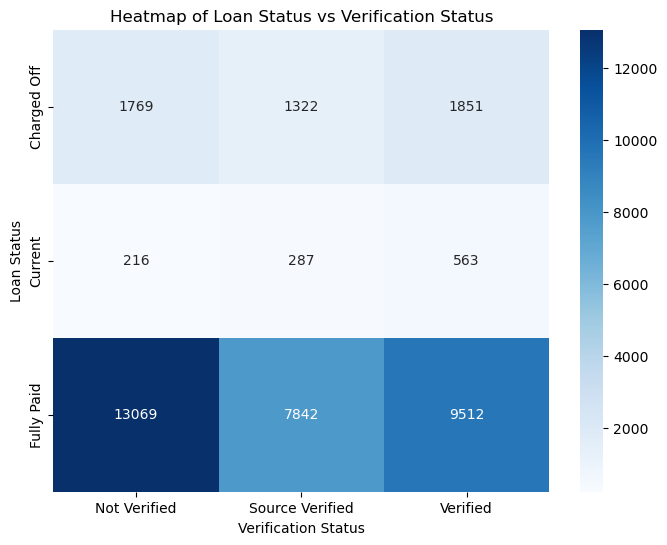

In [157]:
#Plot a heat map of Loan Status vs Verification Status
plt.figure(figsize=(8, 6))
sns.heatmap(loan_verification_status, annot=True, fmt="d", cmap="Blues")

plt.title('Heatmap of Loan Status vs Verification Status')
plt.xlabel('Verification Status')
plt.ylabel('Loan Status')
plt.show()

In [160]:
loan_verification_status_crosstab = pd.crosstab(df['loan_status'], df['verification_status'])
loan_verification_status_crosstab

verification_status,Not Verified,Source Verified,Verified
loan_status,,,
Charged Off,1769,1322,1851
Current,216,287,563
Fully Paid,13069,7842,9512


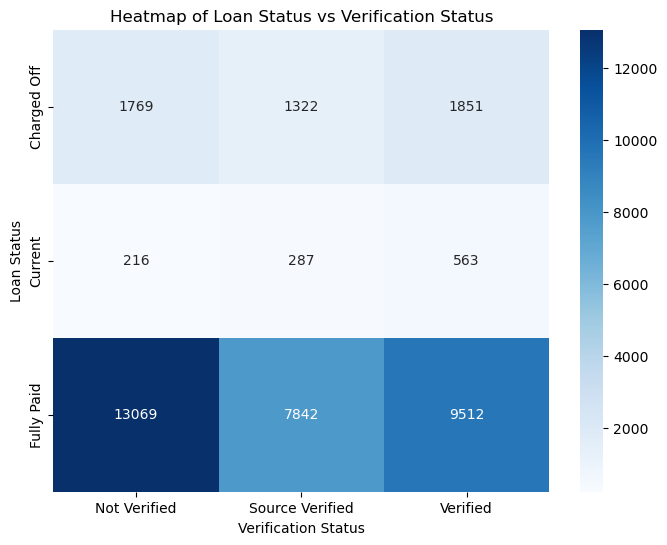

In [162]:
plt.figure(figsize=(8, 6))
sns.heatmap(loan_verification_status_crosstab, annot=True, fmt="d", cmap="Blues")
plt.title('Heatmap of Loan Status vs Verification Status')
plt.xlabel('Verification Status')
plt.ylabel('Loan Status')
plt.show()

### Bivariate analysis between term and loan_status

In [166]:
# created Pivot table term and loan_status
loan_term_status = df.pivot_table(index='loan_status', columns='term', aggfunc='size', fill_value=0)
loan_term_status

term,36 months,60 months
loan_status,,
Charged Off,2729,2213
Current,0,1066
Fully Paid,23646,6777


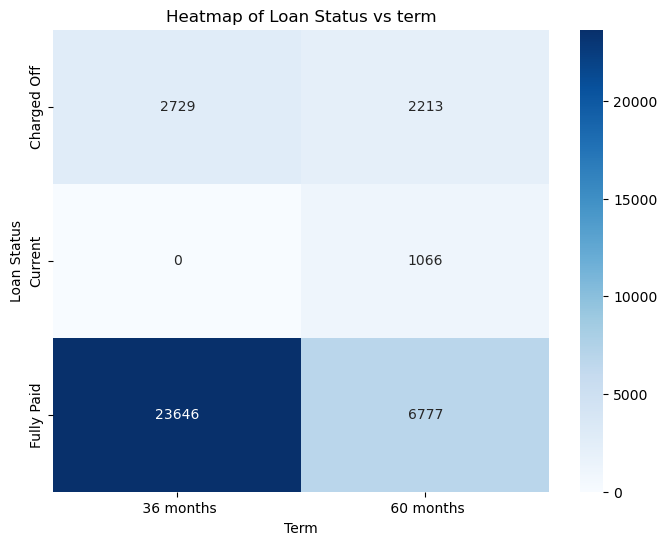

In [168]:
#Plot a heat map of Loan Status vs term
plt.figure(figsize=(8,6))
sns.heatmap(loan_term_status, annot=True, fmt="d",cmap="Blues")
plt.title('Heatmap of Loan Status vs term')
plt.xlabel('Term')
plt.ylabel('Loan Status')
plt.show()

### Bivariate analysis between emp_length and loan_status

In [173]:
# created Pivot table emp_length and loan_status
loan_emp_length_status = df.pivot_table(index='loan_status', columns='emp_length', aggfunc='size', fill_value=0)
loan_emp_length_status

emp_length,1 year,10+ years,2 years,3 years,4 years,5 years,6 years,7 years,8 years,9 years,< 1 year
loan_status,,,,,,,,,,,
Charged Off,408,1233,528,521,427,422,287,248,191,147,530
Current,67,379,95,81,91,86,59,59,44,31,74
Fully Paid,2551,6795,3553,3312,2779,2621,1775,1390,1170,1029,3448


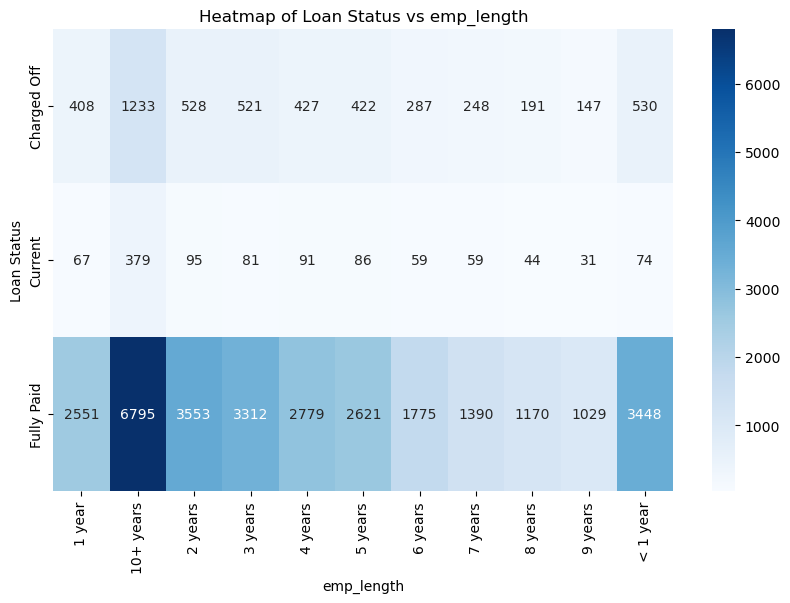

In [175]:
#Plot a heat map of Loan Status vs emp_length
plt.figure(figsize=(10,6))
sns.heatmap(loan_emp_length_status, annot=True, fmt="d",cmap="Blues")
plt.title('Heatmap of Loan Status vs emp_length')
plt.xlabel('emp_length')
plt.ylabel('Loan Status')
plt.show()

In [177]:
#Calculated % for each cell 
loan_emp_length_status_percentage = loan_emp_length_status / loan_emp_length_status.sum().sum() * 100
loan_emp_length_status_percentage

emp_length,1 year,10+ years,2 years,3 years,4 years,5 years,6 years,7 years,8 years,9 years,< 1 year
loan_status,,,,,,,,,,,
Charged Off,1.119925,3.384480,1.449315,1.430101,1.172079,1.158354,0.787791,0.680739,0.524279,0.403503,1.454805
Current,0.183909,1.040323,0.260767,0.222338,0.249787,0.236063,0.161950,0.161950,0.120776,0.085092,0.203124
Fully Paid,7.002278,18.651698,9.752683,9.091159,7.628119,7.194422,4.872224,3.815432,3.211551,2.824518,9.464467


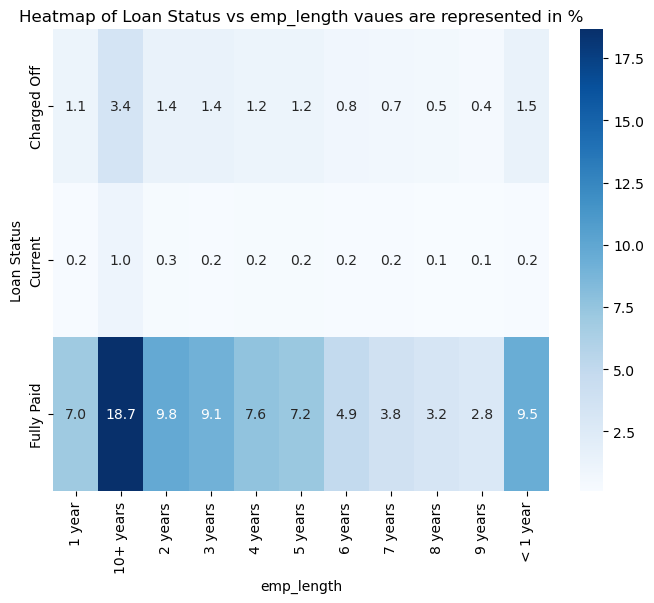

In [179]:
#Plot a heat map of Loan Status vs emp_length data represented in % 
plt.figure(figsize=(8,6))
sns.heatmap(loan_emp_length_status_percentage, annot=True, fmt="0.1f",cmap="Blues")
plt.title('Heatmap of Loan Status vs emp_length vaues are represented in %')
plt.xlabel('emp_length')
plt.ylabel('Loan Status')
plt.show()

### Bivariate analysis between Home_owner and loan_status

In [183]:
loan_home_ownership_status = df.pivot_table(index='loan_status', columns='home_ownership', aggfunc='size', fill_value=0)
loan_home_ownership_status

home_ownership,MORTGAGE,OTHER,OWN,RENT
loan_status,,,,
Charged Off,2061,18,346,2517
Current,597,0,70,399
Fully Paid,13640,76,2159,14548


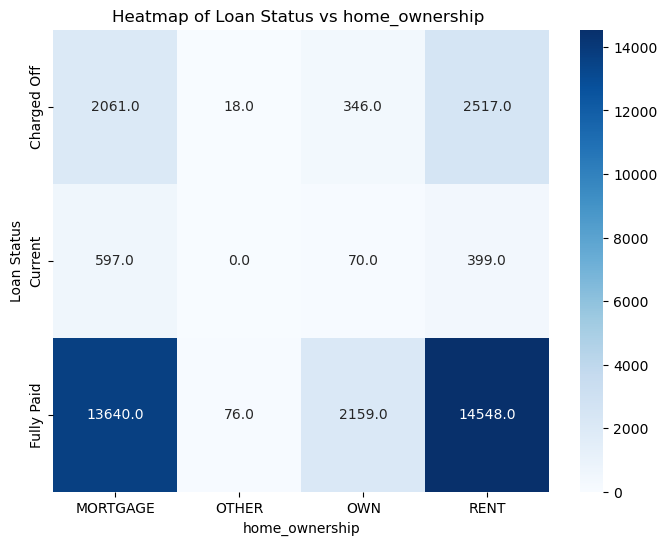

In [185]:
# Heat map of home_owner and loan_status
plt.figure(figsize=(8,6))
sns.heatmap(loan_home_ownership_status, annot=True, fmt="0.1f",cmap="Blues")
plt.title('Heatmap of Loan Status vs home_ownership ')
plt.xlabel('home_ownership')
plt.ylabel('Loan Status')
plt.show()

In [188]:
#Calculated % for each cell pivot table of home_owner and Loan status
loan_home_ownership_status_percentage = loan_home_ownership_status / loan_home_ownership_status.sum().sum() * 100
loan_home_ownership_status_percentage

home_ownership,MORTGAGE,OTHER,OWN,RENT
loan_status,,,,
Charged Off,5.657270,0.049408,0.949741,6.908951
Current,1.638714,0.000000,0.192144,1.095221
Fully Paid,37.440641,0.208614,5.926272,39.933024


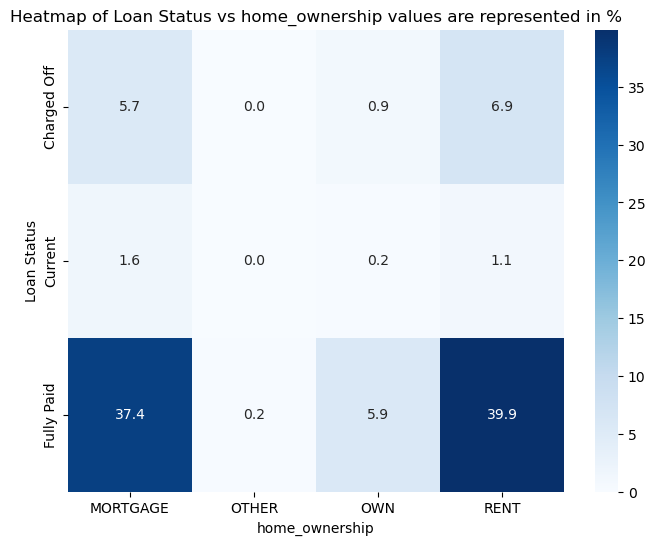

In [190]:
# Heat map of home_owner and loan_status
plt.figure(figsize=(8,6))
sns.heatmap(loan_home_ownership_status_percentage, annot=True, fmt="0.1f",cmap="Blues")
plt.title('Heatmap of Loan Status vs home_ownership values are represented in %')
plt.xlabel('home_ownership')
plt.ylabel('Loan Status')
plt.show()

### Bivariate analysis between grade and loan_status

In [194]:
#  Pivot table grade and loan_status
loan_grade_status = df.pivot_table(index='loan_status', columns='grade', aggfunc='size', fill_value=0)
loan_grade_status

grade,A,B,C,D,E,F,G
loan_status,,,,,,,
Charged Off,513,1253,1169,980,648,286,93
Current,35,317,250,212,169,67,16
Fully Paid,8627,9465,6011,3682,1833,616,189


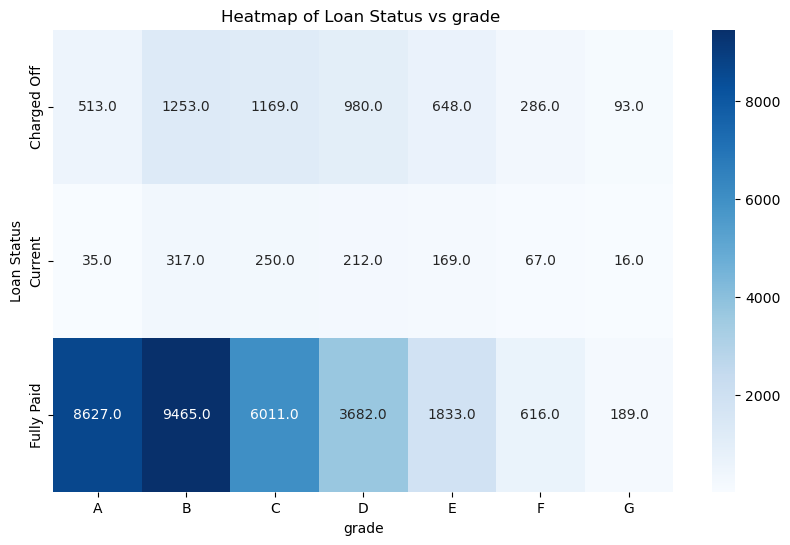

In [196]:
# heat map loan status and grade
plt.figure(figsize=(10,6))
sns.heatmap(loan_grade_status, annot=True, fmt="0.1f",cmap="Blues")
plt.title('Heatmap of Loan Status vs grade ')
plt.xlabel('grade')
plt.ylabel('Loan Status')
plt.show()

In [198]:
#Calculated % for each cell pivot table of grade and Loan status
loan_grade_status_percentage = loan_grade_status / loan_grade_status.sum().sum() * 100
loan_grade_status_percentage

grade,A,B,C,D,E,F,G
loan_status,,,,,,,
Charged Off,1.408141,3.439379,3.208806,2.690017,1.778705,0.785046,0.255277
Current,0.096072,0.870138,0.686229,0.581922,0.463891,0.183909,0.043919
Fully Paid,23.680382,25.980621,16.499684,10.106777,5.031429,1.690868,0.518789


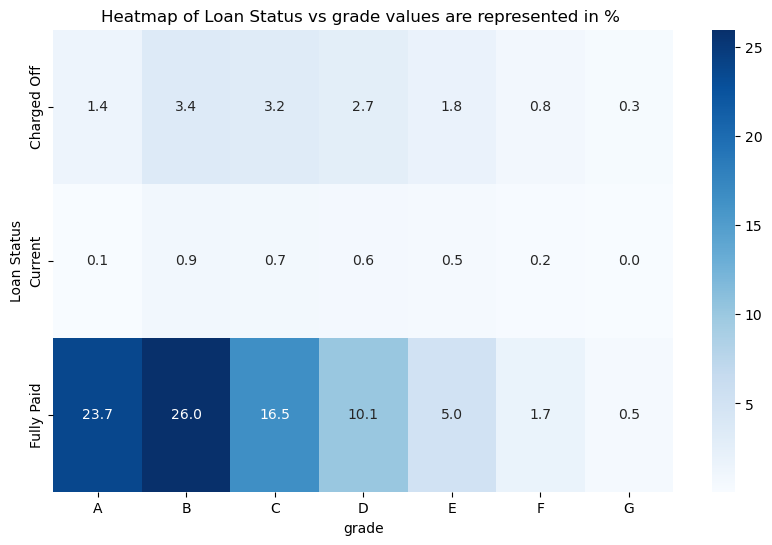

In [200]:
# heat map loan status and grade
plt.figure(figsize=(10,6))
sns.heatmap(loan_grade_status_percentage, annot=True, fmt="0.1f",cmap="Blues")
plt.title('Heatmap of Loan Status vs grade values are represented in % ')
plt.xlabel('grade')
plt.ylabel('Loan Status')
plt.show()

### Bivariate analysis between delinq_2yrs and loan_status 

In [204]:
#  Pivot table delinq_2yrs and loan_status
loan_delinq_status = df.pivot_table(index='loan_status', columns='delinq_2yrs', aggfunc='size', fill_value=0)
loan_delinq_status

delinq_2yrs,0,1,2,3,4,5,6,7,8,9,11
loan_status,,,,,,,,,,,
Charged Off,4354,433,112,25,12,3,1,1,1,0,0
Current,953,89,14,8,2,0,0,0,0,0,0
Fully Paid,27177,2506,502,164,41,18,9,3,1,1,1


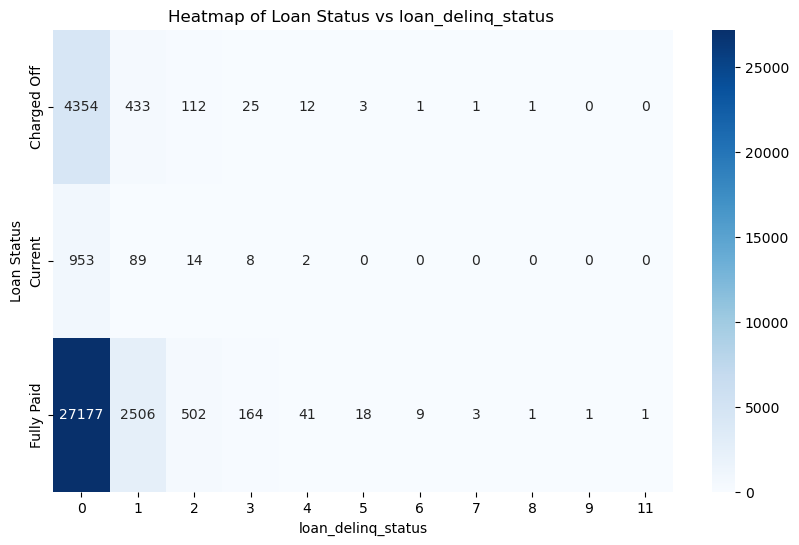

In [206]:
# heat map loan status and delinq_2yrs
plt.figure(figsize=(10,6))
sns.heatmap(loan_delinq_status, annot=True, fmt="d",cmap="Blues")
plt.title('Heatmap of Loan Status vs loan_delinq_status ')
plt.xlabel('loan_delinq_status')
plt.ylabel('Loan Status')
plt.show()

### Bivariate analysis between term and loan_status 

In [210]:
#  Pivot table term and loan_status
loan_term_status = df.pivot_table(index='loan_status', columns='term', aggfunc='size', fill_value=0)
loan_term_status

term,36 months,60 months
loan_status,,
Charged Off,2729,2213
Current,0,1066
Fully Paid,23646,6777


In [212]:
#Calculated % for each cell pivot table of term and Loan status
loan_term_status_percentage = loan_term_status / loan_term_status.sum().sum() * 100
loan_term_status_percentage

term,36 months,60 months
loan_status,,
Charged Off,7.490873,6.074497
Current,0.000000,2.926079
Fully Paid,64.906261,18.602289


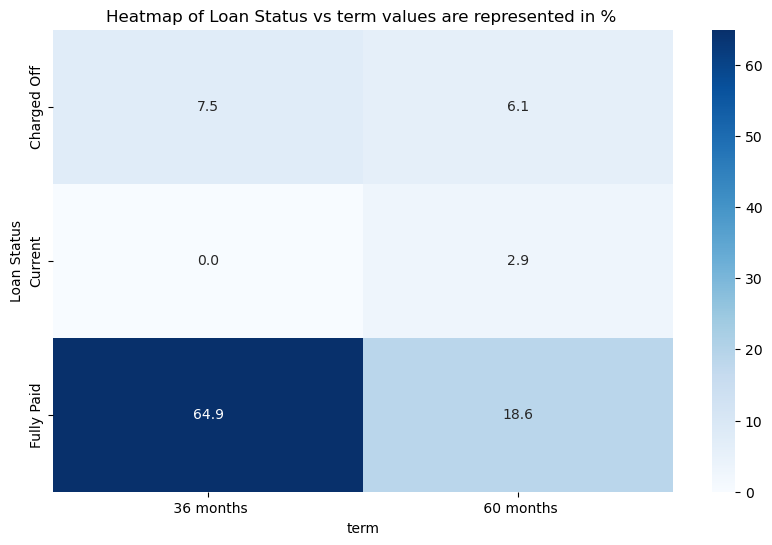

In [214]:
# heat map loan status and term
plt.figure(figsize=(10,6))
sns.heatmap(loan_term_status_percentage, annot=True, fmt="0.1f",cmap="Blues")
plt.title('Heatmap of Loan Status vs term values are represented in % ')
plt.xlabel('term')
plt.ylabel('Loan Status')
plt.show()